# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 1) Is the distribution of body temperatures normal?

In [5]:
temperature = df['temperature']
female_temperature = df[df['gender']=='F']['temperature']
male_temperature = df[df['gender']=='M']['temperature']

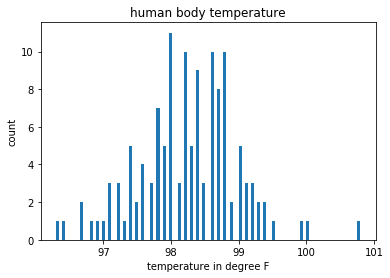

In [6]:
plt.hist(temperature,bins=100)
plt.title('human body temperature')
plt.xlabel('temperature in degree F')
plt.ylabel('count')
plt.show()

In [7]:
def ecdf(data):
    """compute ecdf"""
    return np.sort(data), np.arange(1, len(data)+1)/len(data)

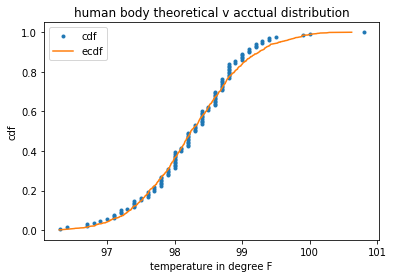

In [8]:
x_temp, y_temp = ecdf(temperature)
theoretical = np.random.normal(np.mean(temperature), np.std(temperature), size=1000)
x_theo_temp, y_theo_temp = ecdf(theoretical)

plt.plot(x_temp,y_temp,marker='.',linestyle='none')
plt.plot(x_theo_temp,y_theo_temp)
plt.title('human body theoretical v acctual distribution')
plt.ylabel('cdf')
plt.xlabel('temperature in degree F')
plt.legend(('cdf','ecdf'))
plt.show()

In [9]:
n_stat, n_pval = stats.normaltest(temperature)
print('normal test statistic:\t',n_stat,'\nnormal test p value:\t',n_pval)

normal test statistic:	 2.70380143332 
normal test p value:	 0.258747986349


From normal test we get p-val which is greater than 0.05, plus we see the temperatures distribution lie in theoretical distribution.

So we can say that the temperature is normally distributed.

### 2) Is the sample size large? Are the observations independent?

In [10]:
print('total\t:',len(temperature),'\nfemale\t:',len(female_temperature),'\nmale\t:',len(male_temperature))

total	: 130 
female	: 65 
male	: 65


Sample should be more than 30 for CLT, here we see we have more than 30 and we can say the sample size is large.

The observations are independent since there is no dependency on other temperature observations (i.e, no correlation)

### Is the true population mean really 98.6 degrees F?

First, try a bootstrap hypothesis test.

In [11]:
bootstrap_replicates = np.empty(10000)

for i in range(10000):
    bootstrap_replicates[i] = np.mean(np.random.choice(temperature,size=len(temperature)))

bootstrap_pval = np.sum(bootstrap_replicates >= 98.6)/10000
print('bootstrap p value:\t',bootstrap_pval)

bootstrap p value:	 0.0


p value is zero for replicates, it implies that the mean is not 98.6 (as mentioned in Q)

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

In [12]:
mean_temperature = temperature.mean()
std_temperature = temperature.std()
print('mean:',mean_temperature,'\tstd:',std_temperature)
temperature_dist_err = std_temperature/np.sqrt(len(temperature))
print('temperature distribution error:\t',temperature_dist_err)

mean: 98.24923076923078 	std: 0.7331831580389454
temperature distribution error:	 0.0643044168379


Calculate 95% confidence interval.

In [13]:
## mean (+/-) 2.0 * distribution
five_per = mean_temperature - 1.96*temperature_dist_err
nine_five_per = mean_temperature + 1.96*temperature_dist_err
print('95% confidence [',five_per ,' , ',nine_five_per, ']')

95% confidence [ 98.1231941122  ,  98.3752674262 ]


One-sample test will be used, since we are having one group (not comparing with different groups) and comparing with mean (98.6).

In this situation, is it appropriate to use the  tt  or  zz  statistic?

It is appropriate to use z-test, since the sample size is greater than 30.

Now try using the other test. How is the result be different? Why?

In [14]:
tt_stat, tt_pval = stats.ttest_1samp(temperature, 98.6, axis=0)
print('tt statistic:\t',tt_stat, '\ntt p_value:\t',tt_pval)

tt statistic:	 -5.45482329236 
tt p_value:	 2.41063204156e-07


In [15]:
zz_value = (mean_temperature - 98.6)/(std_temperature/np.sqrt(len(temperature)))
zz_pval = stats.norm.sf(abs(zz_value))*2 #twosided
print('zz statistic:\t',zz_value, '\nzz p_value:\t',zz_pval)

zz statistic:	 -5.45482329236 
zz p_value:	 4.90215701411e-08


p value of t-test is larger than z-test, meaning t-test distribution is fatter than z-test distribution still less than 0.05, so mean temperaure is not 98.6.

### 4) Draw a small sample of size 10 from the data and repeat both frequentist tests.

Which one is the correct one to use?

What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [16]:
temperature_10 = np.random.choice(temperature, size=10)
print(temperature_10)

[ 98.5  98.6  98.4  97.8  98.6  96.3  98.2  98.   98.4  96.9]


In [17]:
# frequentist test
mean_temperature_10 = temperature_10.mean()
std_temperature_10 = temperature_10.std()
print('mean (10):\t',mean_temperature_10 ,'\nstd (10):\t',std_temperature_10)
temperature_dist_10 = std_temperature_10/np.sqrt(len(temperature_10))
print('temperature distribution error (10):\t',temperature_dist_10)

mean (10):	 97.97 
std (10):	 0.738985791474
temperature distribution error (10):	 0.233687825956


In [18]:
five_per_10 = mean_temperature_10 - 2*temperature_dist_10
nine_five_per_10 = mean_temperature_10 + 2*temperature_dist_10
print('95% confidence [',five_per_10 ,' , ',nine_five_per_10, ']')

95% confidence [ 97.5026243481  ,  98.4373756519 ]


In [19]:
# tt-test
tt_stat_10, tt_pval_10 = stats.ttest_1samp(temperature_10, 98.6, axis=0)
print('tt statistic (10):\t',tt_stat_10, '\ntt p_value (10):\t',tt_pval_10)

tt statistic (10):	 -2.55755932226 
tt p_value (10):	 0.0308102511401


In [20]:
# zz-test
zz_value_10 = (mean_temperature_10 - 98.6)/(std_temperature_10/np.sqrt(len(temperature_10)))
zz_pval_10 = stats.norm.sf(abs(zz_value_10))*2 #twosided
print('zz statistic (10):\t',zz_value_10, '\nzz p_value (10):\t',zz_pval_10)

zz statistic (10):	 -2.69590423644 
zz p_value (10):	 0.00701978447822


p_values for both tests are close to 0.5, the random sample selection does have a mean temperature close to 98.6

Also There seems to be a significant difference in tt-test and zz-test (we might end up having incorrect results), ideally t-statistic is to be used if sample is less than 30. 

### 5) At what temperature should we consider someone's temperature to be "abnormal"?

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

In [21]:
bootstrap_replicates = np.empty(10000)
for i in range(10000):
    bootstrap_replicates[i] = np.mean(np.random.choice(temperature,size=len(temperature)))
bootstrap_ci = np.percentile(bootstrap_replicates,[2.5,97,5])
print('95% confidence :[',bootstrap_ci[0],',',bootstrap_ci[1],']')

95% confidence :[ 98.1261538462 , 98.3692307692 ]


In [22]:
bootstrap_mean_temperature = bootstrap_replicates.mean()
bootstrap_std_temperature = bootstrap_replicates.std()
print('mean:\t',bootstrap_mean_temperature,'\nstd:\t',bootstrap_std_temperature)

bootstrap_temperature_dist_err = bootstrap_std_temperature/np.sqrt(len(temperature))
print('temperature distribution error:\t',bootstrap_temperature_dist_err)

bootstrap_five_per = bootstrap_mean_temperature - 1.96*bootstrap_temperature_dist_err
bootstrap_nine_five_per = bootstrap_mean_temperature + 1.96*bootstrap_temperature_dist_err
print('95% confidence [',bootstrap_five_per ,' , ',bootstrap_nine_five_per, ']')

# bit confusion here.

mean:	 98.2493641538 
std:	 0.0633639993192
temperature distribution error:	 0.00555739037383
95% confidence [ 98.2384716687  ,  98.260256639 ]


Calculate predictive intervals using a normal interval.

In [23]:
predictive_ci = stats.norm.interval(0.95, loc=mean_temperature, scale=std_temperature)
predictive_ci

(96.812218185403111, 99.686243353058444)

Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [24]:
print('Normal range of temperature [',five_per,' , ', nine_five_per, ']')

Normal range of temperature [ 98.1231941122  ,  98.3752674262 ]


If temperatures lie outside of this interval, it is considered to be abnormal.

Also let's calculate the 95% confidence interval for temperature.

In [25]:
temperature_conf_interval = np.percentile(temperature, [2.5,97.5])
print('95% confidence interval :[',temperature_conf_interval[0],',',temperature_conf_interval[1],']')

95% confidence interval :[ 96.7225 , 99.4775 ]


We consider to be abnormal if temperature lies above and below of the 95% confidence interval.

### 6) Is there a significant difference between males and females in normal temperature?

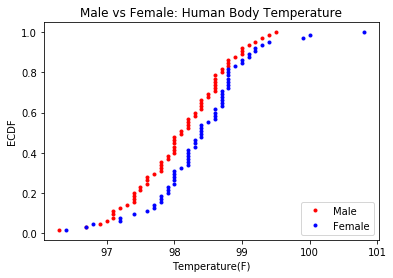

The difference between the male and female mean temperatures is 0.289230769231


In [26]:
x_male, y_male = ecdf(male_temperature)
x_female, y_female = ecdf(female_temperature)

plt.plot(x_male, y_male, marker='.', linestyle='none', color='red')
plt.plot(x_female, y_female, marker='.', linestyle='none', color='blue')
plt.xlabel('Temperature(F)')
plt.ylabel('ECDF')
plt.legend(('Male', 'Female'), loc='lower right')
plt.title('Male vs Female: Human Body Temperature')
plt.show()

male_and_female_diff = np.abs(np.mean(male_temperature) - np.mean(female_temperature))
print('The difference between the male and female mean temperatures is', male_and_female_diff)

What testing approach did you use and why?

In [27]:
t_fm_stat, p_fm_value = stats.ttest_ind(female_temperature, male_temperature, axis=0, equal_var=False)
print('statistic:\t',t_fm_stat,'\np val:\t\t',p_fm_value)

statistic:	 2.28543453817 
p val:		 0.0239382641829


In [28]:
bootstrap_permutations_replicates = np.empty(10000)
for i in range(10000):
    combined = np.random.permutation(np.concatenate((female_temperature,male_temperature)))
    female_permutation = combined[:len(female_temperature)]
    male_permutation = combined[len(male_temperature):]
    bootstrap_permutations_replicates[i] = np.abs(np.mean(female_permutation) - np.mean(male_permutation))
    #print(bootstrap_permutations[i])
bootstrap_permutations_replicates_pval = np.sum(bootstrap_permutations_replicates > male_and_female_diff)/10000
print('p value :',bootstrap_permutations_replicates_pval)

p value : 0.0256


We see above p value is less than 0.05, which means statistically significant (i.e, there is a significant difference between male and female temperatures).

#### Write a story with your conclusion in the context of the original problem.

The report stated that the mean normal body temperature was held to be 37 deg C or 98.6 deg F for more than 120 years but, from our statistical analysis we see that the mean body temperature is lower than expected and the range lies between 98.12 to 98.37 deg F. Also there is statistical difference between male and female body temperatures.